In [1]:
import torch
import torch.nn as nn
import sys
sys.path.append('../')
from models.base_cnn import CnnBaseModel
import matplotlib.pyplot as plt

device = 'cuda'

In [2]:
model = CnnBaseModel()
model

CnnBaseModel created


CnnBaseModel(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (avg_pool): AvgPool2d(kernel_size=3, stride=3, padding=0)
  (fc): Linear(in_features=64, out_features=10, bias=True)
)

In [3]:
PATH = '/scratch/fk/checkpoints/D2_0_5.pt'
weights = torch.load(PATH, map_location='cpu')
for name, param in weights.items():
    weights[name] = param

model.load_state_dict(weights)

<All keys matched successfully>

In [4]:
data = torch.load('../mnist-val.pth')

model.eval()
with torch.no_grad():
    y_pred = torch.argmax(model(data['X']), dim=-1)
    acc = (y_pred == data['y']).sum()/len(data['X'])

y_pred.shape, acc


(torch.Size([128]), tensor(0.6641))

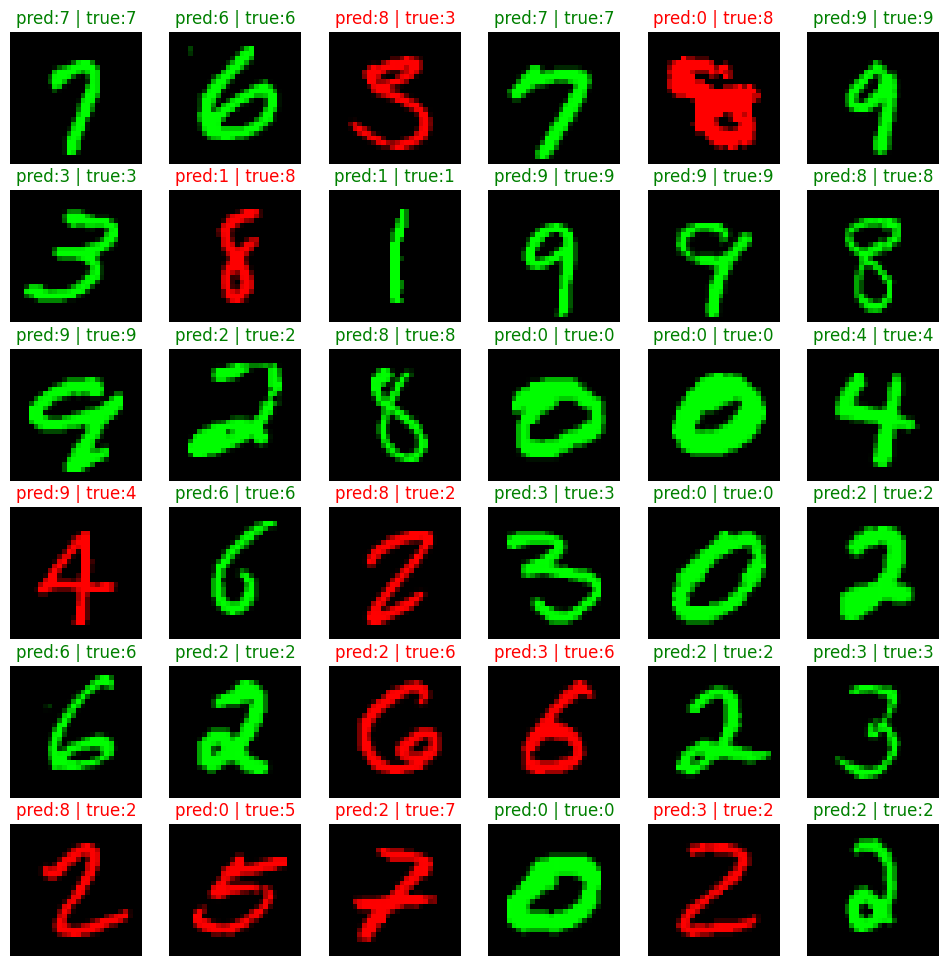

In [5]:
def plot_grid(X, y, y_pred, n=36):
    plt.figure(figsize=(12, 12))
    for i in range(36):
        plt.subplot(6, 6, i + 1)
        i = i + 36
        if y_pred[i] == y[i]:
            img = torch.stack([torch.zeros_like(X[i]), X[i], torch.zeros_like(X[i])], dim=0)
        else:
            img = torch.stack([X[i], torch.zeros_like(X[i]), torch.zeros_like(X[i])], dim=0)
        plt.imshow(img.permute(1, 2, 0), cmap='gray')
        plt.title(f'pred:{y_pred[i]} | true:{y[i]}', color='green' if y_pred[i] == y[i] else 'red')
        plt.axis('off')
        
    plt.show()
    
plot_grid(data['X'].squeeze(1), data['y'], y_pred)